##CNN

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
import torch.optim as optim
import torch.functional as F


In [2]:

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
train_images.shape

(60000, 28, 28, 1)

In [17]:
class fc_model(nn.Module):
  def __init__(self,hidden_dim):
    super(fc_model,self).__init__()
    self.block=nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim,10),
        nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.block(x)

In [10]:
from torch.utils.data import TensorDataset, DataLoader

train_images_tensor = torch.Tensor(train_images)
train_labels_tensor = torch.Tensor(train_labels).long()  # Use .long() for integer labels
test_images_tensor = torch.Tensor(test_images)
test_labels_tensor = torch.Tensor(test_labels).long()


train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [27]:

model=fc_model(128)
optimizer=optim.Adam(model.parameters(),lr=0.001,weight_decay=0.02)
criterion=nn.CrossEntropyLoss()

num_epochs = 100 # Number of training epochs

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        # outputs=outputs.argmax(dim=1)
        # labels=labels.view((-1,1))
        # print(outputs[:5],labels[:5])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}, Test Accuracy: {100 * correct / total}%')


Epoch [1/100], Train Loss: 1.8494337917899273, Test Accuracy: 74.31%
Epoch [2/100], Train Loss: 1.8159747783309106, Test Accuracy: 74.13%
Epoch [3/100], Train Loss: 1.814409795092113, Test Accuracy: 73.91%
Epoch [4/100], Train Loss: 1.812673415710677, Test Accuracy: 73.72%
Epoch [5/100], Train Loss: 1.8122940334175694, Test Accuracy: 74.47%
Epoch [6/100], Train Loss: 1.8112554707761004, Test Accuracy: 74.41%
Epoch [7/100], Train Loss: 1.8108081072886615, Test Accuracy: 74.15%
Epoch [8/100], Train Loss: 1.810489832211151, Test Accuracy: 74.75%
Epoch [9/100], Train Loss: 1.810179640743524, Test Accuracy: 74.72%
Epoch [10/100], Train Loss: 1.8101905210694271, Test Accuracy: 74.63%
Epoch [11/100], Train Loss: 1.8095673533645011, Test Accuracy: 74.75%
Epoch [12/100], Train Loss: 1.809704140305265, Test Accuracy: 74.93%
Epoch [13/100], Train Loss: 1.8093890499458638, Test Accuracy: 74.32%
Epoch [14/100], Train Loss: 1.809631001339284, Test Accuracy: 75.02%
Epoch [15/100], Train Loss: 1.80924

In [54]:
class CNN_Model(nn.Module):
  def __init__(self):
    super(CNN_Model,self).__init__()
    self.block=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        #
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=2,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        # nn.ReLU(),
        # nn.Conv2d(in_channels=2,out_channels=2,kernel_size=2,stride=1),
        nn.Flatten(),
        nn.Linear(1152,10),
        # nn.ReLU(),
        # nn.Linear(64,10),
        nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.block(x)


In [55]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Sequential(
#             nn.Conv2d(
#                 in_channels=1,
#                 out_channels=16,
#                 kernel_size=5,
#                 stride=1,
#                 padding=2,
#             ),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#         )
#         self.conv2 = nn.Sequential(
#             nn.Conv2d(16, 32, 5, 1, 2),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#         )
#         # fully connected layer, output 10 classes
#         self.out = nn.Linear(32 * 7 * 7, 10)
#         self.softmax=nn.Softmax(dim=1)
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
#         # x = x.view(x.size(0), -1)
#         x=nn.Flatten()(x)
#         output = self.out(x)

#         return self.softmax(output)

In [58]:

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=CNN_Model().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.002,weight_decay=0.02)
criterion=nn.CrossEntropyLoss()

num_epochs = 100 # Number of training epochs

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images,labels=images.to(device),labels.to(device)
        images=images.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs = model(images)
        # outputs=outputs.argmax(dim=1)
        # labels=labels.view((-1,1))
        # print(outputs.size())
        # print(outputs[:1],labels[:5])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images,labels=images.to(device),labels.to(device)
            images=images.permute(0,3,1,2)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}, Test Accuracy: {100 * correct / total}%')


Epoch [1/100], Train Loss: 1.661992449114826, Test Accuracy: 90.46%
Epoch [2/100], Train Loss: 1.6059085839847003, Test Accuracy: 91.32%
Epoch [3/100], Train Loss: 1.6029801996532025, Test Accuracy: 89.66%
Epoch [4/100], Train Loss: 1.6005964454557342, Test Accuracy: 90.86%
Epoch [5/100], Train Loss: 1.6001000131117, Test Accuracy: 90.74%
Epoch [6/100], Train Loss: 1.5991645377836248, Test Accuracy: 90.98%
Epoch [7/100], Train Loss: 1.5993587364520092, Test Accuracy: 91.02%
Epoch [8/100], Train Loss: 1.597828874710018, Test Accuracy: 90.72%
Epoch [9/100], Train Loss: 1.5981221014756892, Test Accuracy: 90.7%
Epoch [10/100], Train Loss: 1.5975321879519073, Test Accuracy: 89.9%
Epoch [11/100], Train Loss: 1.5965606560076733, Test Accuracy: 91.56%
Epoch [12/100], Train Loss: 1.5968807418463327, Test Accuracy: 91.21%
Epoch [13/100], Train Loss: 1.596718032222821, Test Accuracy: 91.41%
Epoch [14/100], Train Loss: 1.5963868209039733, Test Accuracy: 91.58%
Epoch [15/100], Train Loss: 1.5962748

##Variational Autoencoder

In [1]:
import numpy as np
import torch
import pandas as pd
import tensorflow as tf

In [2]:
def vae_loss_function(x, x_recon, mu, logsigma, kl_weight=0.0005):
  latent_loss = (1/2*(torch.exp(logsigma) + mu**2 - 1 -logsigma)).sum(dim=1)
  # latent_loss=1/2*(torch.exp(logsigma) + mu**2 - 1 -logsigma)

  # reconstruction_loss =  torch.mean(torch.abs(x - x_recon)) #(x-x_recon)**2
  # reconstruction_loss =  torch.abs(x - x_recon)
  # print(x[0])
  # print(x_recon[0])
  reconstruction_loss = torch.abs(x - x_recon).view(x.size(0), -1).sum(dim=1)

  vae_loss = reconstruction_loss + kl_weight*latent_loss
  vae_loss = vae_loss.view(-1, 1)
  # print("vae_loss",vae_loss)
  # print("reconstruction_loss:",reconstruction_loss)
  # print("latent_loss:",latent_loss)

  return vae_loss

def sampling(z_mean, z_logsigma):
  # By default, random.normal is "standard" (ie. mean=0 and std=1.0)
  batch, latent_dim = z_mean.size()
  eps = torch.randn((batch,latent_dim)) #tf.random.normal(shape=(batch, latent_dim))
  z = z_mean + torch.mul(z_logsigma,eps)

  return z

In [3]:
def ss_vae_loss_function(x, x_pred, y, y_logit, mu, logsigma):

  # TODO: call the relevant function to obtain VAE loss, defined earlier in the lab
  vae_loss = vae_loss_function(x,x_pred,mu,logsigma) # TODO
  y_logit=torch.sigmoid(y_logit)

  classification_loss = nn.BCELoss()(y_logit,y.squeeze(dim=1))# TODO

  face_indicator = torch.eq(y, 1).float() #tf.cast(tf.equal(y, 1), tf.float32)
  # print("face_indicator size: ",face_indicator)

  # TODO: define the SS-VAE total loss! Use tf.reduce_mean to average over all
  # samples
  total_loss = classification_loss + torch.mean(face_indicator*vae_loss)
  # print("This loss:",total_loss,)
  # print("classification_loss:",classification_loss)


  return total_loss, classification_loss, vae_loss

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
n_filters=12

class FaceEncoderNetwork(nn.Module):
    def __init__(self, n_filters=12, n_outputs=1):
        super(FaceEncoderNetwork, self).__init__()

        # Define the Conv2D layers with Batch Normalization
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_filters, kernel_size=5, stride=2, padding=2)
        self.bn1 = nn.BatchNorm2d(n_filters)
        self.conv2 = nn.Conv2d(in_channels=n_filters, out_channels=2*n_filters, kernel_size=5, stride=2, padding=2)
        self.bn2 = nn.BatchNorm2d(2*n_filters)
        self.conv3 = nn.Conv2d(in_channels=2*n_filters, out_channels=4*n_filters, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(4*n_filters)

        self.conv4 = nn.Conv2d(in_channels=4*n_filters, out_channels=6*n_filters, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(6*n_filters)
        self.fc1 = nn.Linear(6*n_filters * 4 * 4, 512)
        self.fc2 = nn.Linear(512, n_outputs)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = nn.Flatten()(x) #torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class FaceDecoderNetwork(nn.Module):
    def __init__(self, n_filters=12):
        super(FaceDecoderNetwork, self).__init__()
        self.n_filters = n_filters
        self.dense = nn.Linear(32, 4*4*6*n_filters)
        self.reshape = lambda x: x.view(-1, 6*n_filters, 4, 4)  # Reshape layer
        self.conv_transpose1 = nn.ConvTranspose2d(6*n_filters, 4*n_filters, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_transpose2 = nn.ConvTranspose2d(4*n_filters, 2*n_filters, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_transpose3 = nn.ConvTranspose2d(2*n_filters, 1*n_filters, kernel_size=5, stride=2, padding=2, output_padding=1)
        self.conv_transpose4 = nn.ConvTranspose2d(1*n_filters, 3, kernel_size=5, stride=2, padding=2, output_padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dense(x)
        x = self.relu(x)
        x = self.reshape(x)
        x = self.relu(self.conv_transpose1(x))
        x = self.relu(self.conv_transpose2(x))
        x = self.relu(self.conv_transpose3(x))
        x = self.conv_transpose4(x)
        return x


In [41]:
import matplotlib.pyplot as plt
def plot_sample(x,y,vae):
    plt.figure(figsize=(2,1))
    plt.subplot(1, 2, 1)

    idx = np.where(y==1)[0][0]
    plt.imshow(x[idx])
    plt.grid(False)

    plt.subplot(1, 2, 2)
    _, _, _, recon = vae(x)
    recon = np.clip(recon, 0, 1)
    plt.imshow(recon[idx])
    plt.grid(False)

    plt.show()

def create_grid_of_images(xs, size=(5,5)):
    """ Combine a list of images into a single image grid by stacking them into an array of shape `size` """

    grid = []
    counter = 0
    for i in range(size[0]):
        row = []
        for j in range(size[1]):
          row.append(xs[counter])
          counter += 1
        # row = np.hstack(row)
        grid.append(row)
    # grid = np.vstack(grid)
    return grid

In [50]:
# import sys, h5py
# class TrainingDatasetLoader(object):
#     def __init__(self, data_path):

#         print ("Opening {}".format(data_path))
#         sys.stdout.flush()

#         self.cache = h5py.File(data_path, 'r')

#         print ("Loading data into memory...")
#         sys.stdout.flush()
#         self.images = self.cache['images'][:]
#         self.labels = self.cache['labels'][:].astype(np.float32)
#         self.image_dims = self.images.shape
#         n_train_samples = self.image_dims[0]

#         self.train_inds = np.random.permutation(np.arange(n_train_samples))

#         self.pos_train_inds = self.train_inds[ self.labels[self.train_inds, 0] == 1.0 ]
#         self.neg_train_inds = self.train_inds[ self.labels[self.train_inds, 0] != 1.0 ]

#     def get_train_size(self):
#         return self.train_inds.shape[0]

#     def get_train_steps_per_epoch(self, batch_size, factor=10):
#         return self.get_train_size()//factor//batch_size

#     def get_batch(self, n, only_faces=False, p_pos=None, p_neg=None, return_inds=False):
#         if only_faces:
#             selected_inds = np.random.choice(self.pos_train_inds, size=n, replace=False, p=p_pos)
#         else:
#             selected_pos_inds = np.random.choice(self.pos_train_inds, size=n//2, replace=False, p=p_pos)
#             selected_neg_inds = np.random.choice(self.neg_train_inds, size=n//2, replace=False, p=p_neg)
#             selected_inds = np.concatenate((selected_pos_inds, selected_neg_inds))

#         sorted_inds = np.sort(selected_inds)
#         train_img = (self.images[sorted_inds,:,:,::-1]/255.).astype(np.float32)
#         train_label = self.labels[sorted_inds,...]
#         return (train_img, train_label, sorted_inds) if return_inds else (train_img, train_label)

#     def get_n_most_prob_faces(self, prob, n):
#         idx = np.argsort(prob)[::-1]
#         most_prob_inds = self.pos_train_inds[idx[:10*n:10]]
#         return (self.images[most_prob_inds,...]/255.).astype(np.float32)

#     def get_all_train_faces(self):
#         return self.images[ self.pos_train_inds ]

import h5py
import numpy as np
from torch.utils.data import Dataset, DataLoader

class TrainingDataset(Dataset):
    def __init__(self, data_path, only_faces=False):
        print("Opening {}".format(data_path))
        self.cache = h5py.File(data_path, 'r')
        print("Loading data into memory...")

        self.images = self.cache['images'][:]
        self.labels = self.cache['labels'][:].astype(np.float32)

        if only_faces:
            self.indices = np.where(self.labels[:, 0] == 1.0)[0]
        else:
            self.indices = np.arange(self.labels.shape[0])

        self.images = self.images[self.indices]
        self.labels = self.labels[self.indices]
        n_train_samples = len(self.images)
        self.train_inds = np.random.permutation(np.arange(n_train_samples))

        self.pos_train_inds = self.train_inds[ self.labels[self.train_inds, 0] == 1.0 ]
        self.neg_train_inds = self.train_inds[ self.labels[self.train_inds, 0] != 1.0 ]

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        img = self.images[idx, :, :, ::-1]  # Convert to RGB
        img = img.transpose((2, 0, 1))  # Convert to CxHxW
        img = img.astype(np.float32) / 255.0

        label = self.labels[idx]
        return img, label
    def get_batch(self, n, only_faces=False, p_pos=None, p_neg=None, return_inds=False):
        if only_faces:
            selected_inds = np.random.choice(self.pos_train_inds, size=n, replace=False, p=p_pos)
        else:
            selected_pos_inds = np.random.choice(self.pos_train_inds, size=n//2, replace=False, p=p_pos)
            selected_neg_inds = np.random.choice(self.neg_train_inds, size=n//2, replace=False, p=p_neg)
            selected_inds = np.concatenate((selected_pos_inds, selected_neg_inds))

        sorted_inds = np.sort(selected_inds)
        train_img = torch.tensor(self.images[sorted_inds]/255., dtype=torch.float32).permute(0, 3, 1, 2)
        train_label = torch.tensor(self.labels[sorted_inds], dtype=torch.float32)
        return (train_img, train_label, sorted_inds) if return_inds else (train_img, train_label)

# class TrainingDataset(Dataset):
#     def __init__(self, data_path, only_faces=False):
#         self.cache = h5py.File(data_path, 'r')
#         self.images = self.cache['images'][:]
#         self.labels = self.cache['labels'][:].astype(np.float32)

#         if only_faces:
#             self.indices = np.where(self.labels[:, 0] == 1.0)[0]
#         else:
#             self.indices = np.arange(self.labels.shape[0])

#     def __len__(self):
#         return len(self.indices)

#     def __getitem__(self, idx):
#         index = self.indices[idx]
#         img = torch.tensor(self.images[index]/255., dtype=torch.float32).permute(2, 0, 1)  # Convert to PyTorch format (C, H, W)
#         label = torch.tensor(self.labels[index], dtype=torch.float32)
#         return img, label

#     def get_n_most_prob_faces(self, prob, n):
#         idx = np.argsort(prob)[::-1]
#         most_prob_inds = np.where(self.labels[:, 0] == 1.0)[0][idx[:10*n:10]]
#         return torch.tensor(self.images[most_prob_inds]/255., dtype=torch.float32)

#     def get_all_train_faces(self):
#         return torch.tensor(self.images[np.where(self.labels[:, 0] == 1.0)[0]]/255., dtype=torch.float32)

# Usage
data_path = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1') #'your_data_path.h5'
dataset = TrainingDataset(data_path)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# # Iterate through the dataset
# for images, labels in dataloader:
#     # Training loop here
#     pass



Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [7]:
# path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
# Instantiate a TrainingDatasetLoader using the downloaded dataset
# loader = TrainingDatasetLoader(path_to_training_data)

In [8]:
# number_of_training_examples = dataloader.get_train_size()
# (images, labels) = loader.get_batch(100)

In [9]:
# face_images = images[np.where(labels==1)[0]]
# not_face_images = images[np.where(labels==0)[0]]

# idx_face = 18 #@param {type:"slider", min:0, max:50, step:1}
# idx_not_face = 6 #@param {type:"slider", min:0, max:50, step:1}

# plt.figure(figsize=(8,4))
# plt.subplot(1, 2, 1)
# plt.imshow(face_images[idx_face])
# plt.title("Face"); plt.grid(False)

# plt.subplot(1, 2, 2)
# plt.imshow(not_face_images[idx_not_face])
# plt.title("Not Face"); plt.grid(False)

In [10]:
# images.shape,number_of_training_examples

In [11]:
class SS_VAE(nn.Module):
  def __init__(self, latent_dim):
    super(SS_VAE, self).__init__()
    self.latent_dim = latent_dim

    num_encoder_dims = 2*self.latent_dim + 1

    self.encoder = FaceEncoderNetwork(n_filters,num_encoder_dims)
    self.decoder = FaceDecoderNetwork(n_filters)

  def encode(self, x):
    encoder_output = self.encoder(x)

    y_logit = encoder_output[:,0] #tf.expand_dims(encoder_output[:, 0], -1)
    z_mean = encoder_output[:, 1:self.latent_dim+1]
    z_logsigma = encoder_output[:, self.latent_dim+1:]

    return y_logit, z_mean, z_logsigma

  def decode(self, z):
    reconstruction = self.decoder(z)
    return reconstruction

  # The call function will be used to pass inputs x through the core VAE
  def forward(self, x):
    # Encode input to a prediction and latent space
    y_logit, z_mean, z_logsigma = self.encode(x)

    #call the sampling function that you created above using z_mean and z_logsigma
    z =sampling(z_mean, z_logsigma)

    #reconstruction
    recon = self.decode(z) # TODO

    return y_logit, z_mean, z_logsigma, recon

  # Predict face or not face logit for given input x
  def predict(self, x):
    y_logit, z_mean, z_logsigma = self.encode(x)
    return y_logit

ss_vae = SS_VAE(latent_dim=32)
ss_vae

SS_VAE(
  (encoder): FaceEncoderNetwork(
    (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv2d(48, 72, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn4): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=1152, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=65, bias=True)
  )
  (decoder): FaceDecoderNetwork(
    (dense): Linear(in_features=32, out_features=1152, bias=True)
    (conv_transpose1): ConvTranspose2d(72, 48, ke

In [12]:
### Training the SS-VAE ###

from tqdm.auto import tqdm
batch_size = 32
learning_rate = 5e-4
latent_dim = 32

num_epochs = 12

ss_vae = SS_VAE(latent_dim)
optimizer = torch.optim.Adam(ss_vae.parameters(),learning_rate)


for epoch in tqdm(range(num_epochs)):
    print("Starting epoch {}/{}".format(epoch+1, num_epochs))
    # Training
    ss_vae.train()
    train_loss = 0.0
    for idx,(x,y) in enumerate(dataloader):
        optimizer.zero_grad()
        y_logit, z_mean, z_logsigma, x_recon = ss_vae(x)
        loss, class_loss,_ = ss_vae_loss_function(x, x_recon, y, y_logit, z_mean, z_logsigma)
        # print(loss)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Evaluation
    # model.eval()
    # correct = 0
    # total = 0
    # with torch.no_grad():
    #     for x,y in test_loader:
    #         y_logit, z_mean, z_logsigma, x_recon = ss_vae(x)
    #         loss, class_loss = ss_vae_loss_function(x, x_recon, y, y_logit, z_mean, z_logsigma)
    #         _, predicted = torch.max(y_logit.data, 1)
    #         total += y.size(0)
    #         correct += (predicted == y).sum().item()
    if idx % 500 == 0:
          plot_sample(x, y, ss_vae)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')



  0%|          | 0/12 [00:00<?, ?it/s]

Starting epoch 1/12
Epoch [1/12], Train Loss: 2199276.991546631
Starting epoch 2/12
Epoch [2/12], Train Loss: 1715538.8827514648
Starting epoch 3/12
Epoch [3/12], Train Loss: 1564889.466003418
Starting epoch 4/12
Epoch [4/12], Train Loss: 1497083.4114685059
Starting epoch 5/12
Epoch [5/12], Train Loss: 1457344.1266174316
Starting epoch 6/12
Epoch [6/12], Train Loss: 1424599.7314910889
Starting epoch 7/12
Epoch [7/12], Train Loss: 1397803.0218658447
Starting epoch 8/12
Epoch [8/12], Train Loss: 1377910.774230957
Starting epoch 9/12
Epoch [9/12], Train Loss: 1362614.4054107666
Starting epoch 10/12
Epoch [10/12], Train Loss: 1351005.9844207764
Starting epoch 11/12
Epoch [11/12], Train Loss: 1341612.3842315674
Starting epoch 12/12
Epoch [12/12], Train Loss: 1332715.4745178223


torch.Size([128, 3, 64, 64])
vae_loss torch.Size([128, 1])
[ 26  85 112  94  34  91  44  23  84  25  13 100  45  76  58  36  60  41
 102  64 115  93  19 120 124] (25, 3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


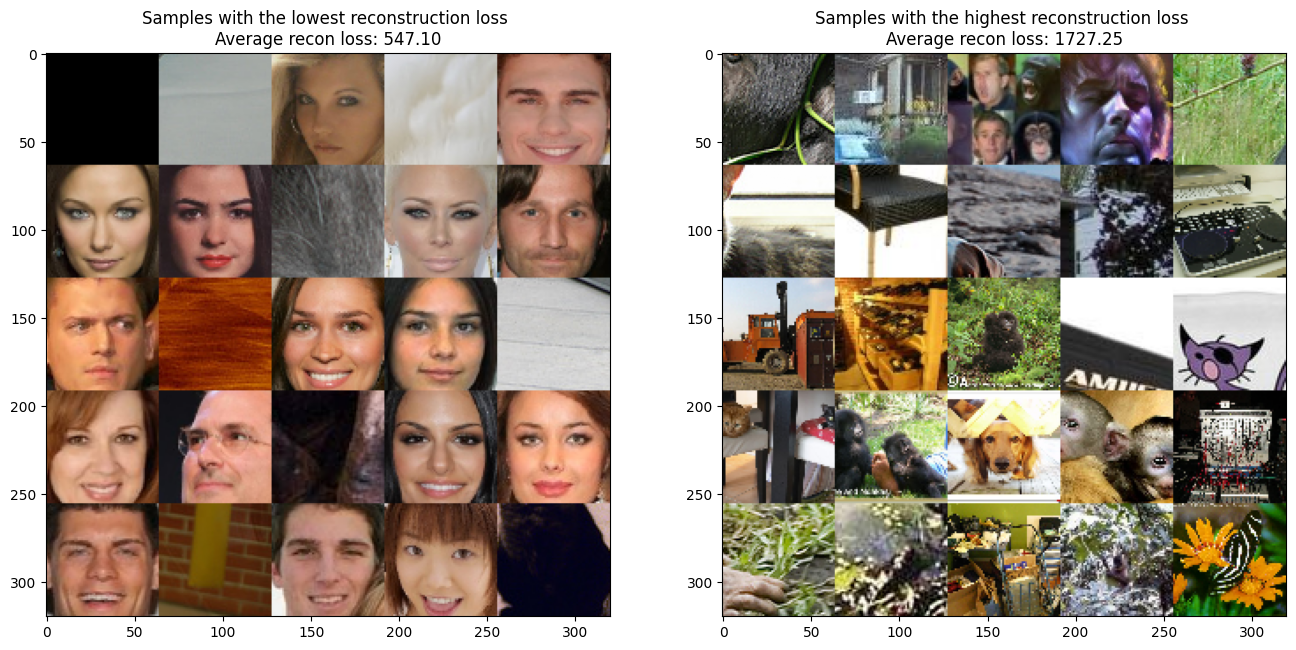

In [65]:
def create_grid_of_images(xs, size=(5, 5)):
    """Combine a list of RGB images into a single image grid."""
    grid_rows = []
    counter = 0
    for _ in range(size[0]):
        row = []
        for _ in range(size[1]):
            if counter < len(xs):
                # Transpose each image from (3, 64, 64) to (64, 64, 3)
                print(xs[counter].shape)
                img = xs[counter].transpose(1, 2, 0)
                row.append(img)
                counter += 1
            else:
                # Append a blank image if there aren't enough images
                row.append(np.zeros((64, 64, 3), dtype=xs[0].dtype))
        grid_rows.append(np.hstack(row))
    grid = np.vstack(grid_rows)
    return grid
data_iterator = iter(dataloader)
x, y = next(data_iterator)
x,y=torch.Tensor(x),torch.Tensor(y)
# x=x.permute(0,3,1,2)
print(x.size())
y_logit, z_mean, z_logsigma, x_recon = ss_vae(x)
loss, class_loss,vae_loss = ss_vae_loss_function(x, x_recon, y, y_logit, z_mean, z_logsigma)
print("vae_loss",vae_loss.size())
# Sort the results by the vae loss scores
vae_loss = vae_loss.squeeze(dim=1).detach().numpy()
ind = np.argsort(vae_loss, axis=None)
print(ind[:25],x.numpy()[ind[:25]].shape)
# Plot the 25 samples with the highest and lowest reconstruction losses
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# x=x.permute(0,3,1,2)
grid=create_grid_of_images(x.numpy()[ind[:25]])
# print(np.ndarray(grid).shape)
ax[0].imshow(grid)
ax[0].set_title("Samples with the lowest reconstruction loss \n" +
                f"Average recon loss: {np.mean(vae_loss[ind[:25]]):.2f}")

ax[1].imshow(create_grid_of_images(x.numpy()[ind[-25:]]))
ax[1].set_title("Samples with the highest reconstruction loss \n" +
                f"Average recon loss: {np.mean(vae_loss[ind[-25:]]):.2f}");

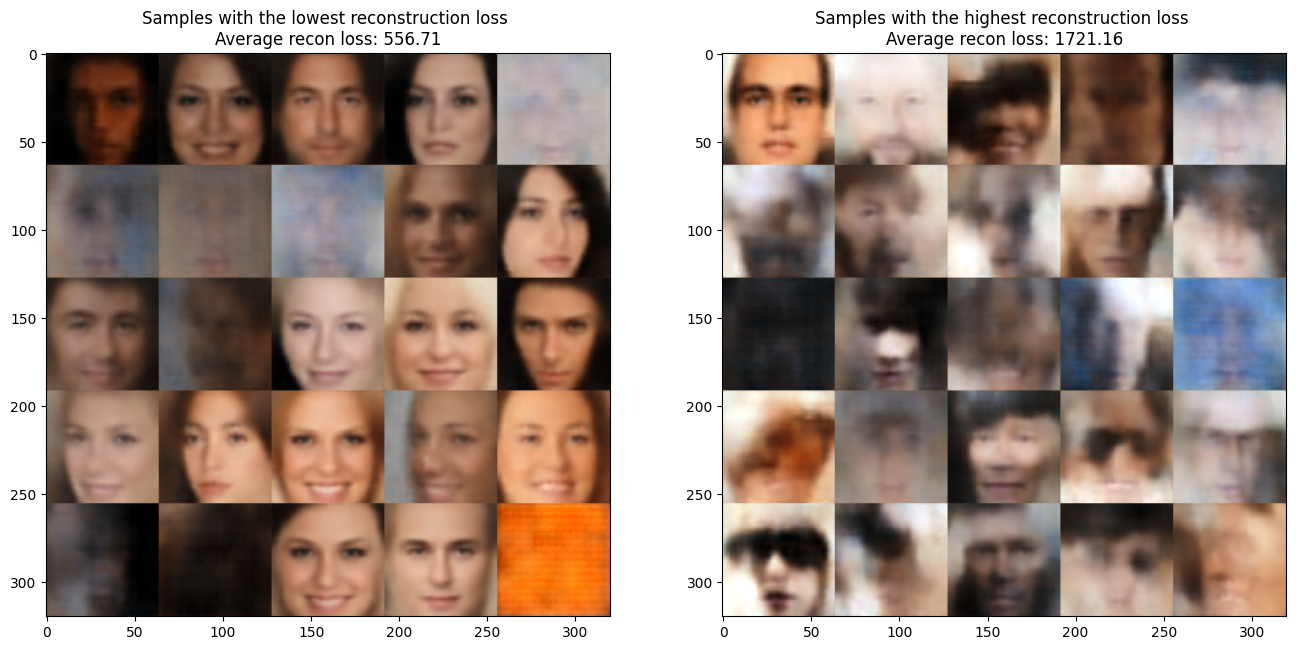

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
x_recon=x_recon.detach()
grid=create_grid_of_images(x_recon.numpy()[ind[:25]])
# print(np.ndarray(grid).shape)
ax[0].imshow(grid)
ax[0].set_title("Samples with the lowest reconstruction loss \n" +
                f"Average recon loss: {np.mean(vae_loss[ind[:25]]):.2f}")

ax[1].imshow(create_grid_of_images(x_recon.numpy()[ind[-25:]]))
ax[1].set_title("Samples with the highest reconstruction loss \n" +
                f"Average recon loss: {np.mean(vae_loss[ind[-25:]]):.2f}");

recons: (15, 3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


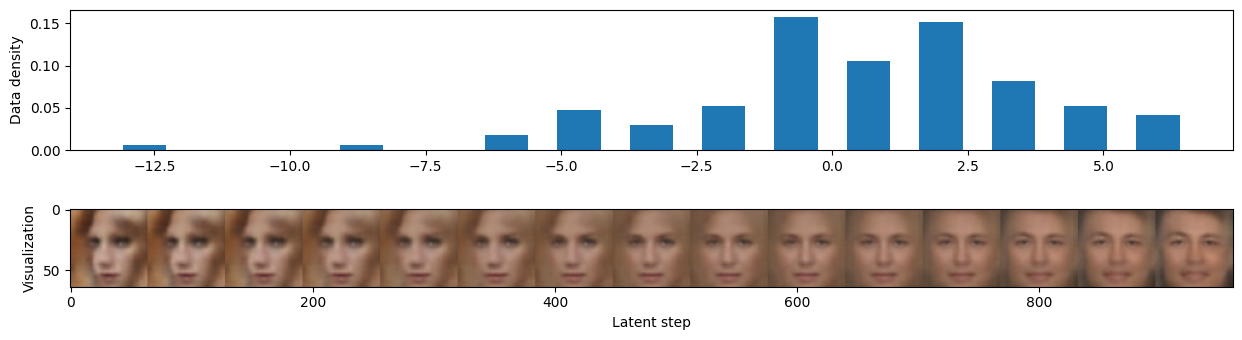

In [67]:
### Inspect different latent features

#@title Change the sliders to inspect different latent features! { run: "auto" }
idx_latent = 3 #@param {type:"slider", min:0, max:31, step:1}
num_steps = 15

# Extract all latent samples from the desired dimension
latent_samples = z_mean[:, idx_latent].detach().numpy()
# Compute their density and plot
density, latent_bins = np.histogram(latent_samples, num_steps, density=True)
fig, ax = plt.subplots(2, 1, figsize=(15, 4))
ax[0].bar(latent_bins[1:], density)
ax[0].set_ylabel("Data density")

# Visualize reconstructions as we walk across the latent space
latent_steps = np.linspace(np.min(latent_samples), np.max(latent_samples), num_steps)
baseline_latent = tf.reduce_mean(z_mean.detach().numpy(), 0, keepdims=True)

recons = []
for step in latent_steps:
  # Adjust the latent vector according to our step
  latent = baseline_latent.numpy()
  latent[0, idx_latent] = step
  # Decode the reconstruction and store
  recons.append(ss_vae.decode(torch.Tensor(latent))[0])
# recons=recons.detach().numpy()
recons_np = [recon.detach().numpy() for recon in recons]

# Stack these numpy arrays into a single numpy array
recons_np_stack = np.stack(recons_np)

# Now you can print the shape
print("recons:", recons_np_stack.shape)
# print("recons:",recons.numpy().shape)
# Visualize all of the reconstructions!
ax[1].imshow(create_grid_of_images(recons_np_stack, (1, num_steps)))
ax[1].set_xlabel("Latent step")
ax[1].set_ylabel("Visualization");

##Risk mitigation using CASPA library

The core idea behind Capsa is that any deep learning model of interest can be *wrapped* -- just like wrapping a gift -- to be made *aware of its own risks*. Risk is captured in **representation bias, data uncertainty, and model uncertainty**.

---
This means that Capsa takes the user's original model as input, and modifies it minimally to create a risk-aware variant while preserving the model's underlying structure and training pipeline


In [1]:
!pip install capsa --quiet
import capsa
import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch

ERROR: Could not find a version that satisfies the requirement capsa (from versions: none)
ERROR: No matching distribution found for capsa


ModuleNotFoundError: ignored

In [ ]:
def gen_data(x_min, x_max, n, train=True):
  if train:
    x = np.random.triangular(x_min, 2, x_max, size=(n, 1))
  else:
    x = np.linspace(x_min, x_max, n).reshape(n, 1)

  sigma = 2*np.exp(-(x+1)**2/1) + 0.2 if train else np.zeros_like(x)
  y = x**3/6 + np.random.normal(0, sigma).astype(np.float32)

  return x, y

# Plot the dataset and visualize the train and test datapoints
x_train, y_train = gen_data(-4, 4, 2000, train=True) # train data
x_test, y_test = gen_data(-6, 6, 500, train=False) # test data

plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, c='r', zorder=-1, label='ground truth')
plt.scatter(x_train, y_train, s=1.5, label='train data')
plt.legend()